In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.measure import block_reduce
%matplotlib inline

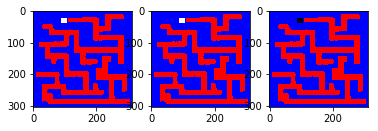

In [6]:
img = plt.imread('maze.jpg')

#img = rescale(img, 1/32.0)
img = downscale_local_mean(img, (10,10,1)) /255.0
plt.subplot(131)
plt.imshow(img)

img = np.pad(img,((3,1),(3,1),(0,0)),mode='constant',constant_values=0)
for y in xrange(img.shape[0]):
    for x in xrange(img.shape[1]):
        if img[y,x,:].sum() == 0:
            img[y,x,:] = [0,0,1]
        if img[y,x,:].max() - img[y,x,:].min() < 0.4:
            img[y,x,:] = [0,0,1]
        if img[y,x,0] == img[y,x,:].max():
            img[y,x,:] = [1,0,0]
        if img[y,x,2] == img[y,x,:].max():
            img[y,x,:] = [0,0,1]
        if img[y,x,1] == img[y,x,:].max():
            img[y,x,:] = [1,1,1]
plt.subplot(132)
plt.imshow(img)
maze_viz = img.copy()
plt.subplot(131)
plt.imshow(maze_viz)

for y in xrange(maze_viz.shape[0]):
    for x in xrange(maze_viz.shape[1]):
        if maze_viz[y,x,:].sum() > 1.5:
            maze_viz[y,x,:] = [0,0,0]
        elif maze_viz[y,x,0] > 0.55:
            maze_viz[y,x,:] = [1,0,0]
        else:
            maze_viz[y,x,:] = [0,0,1]
img = maze_viz
plt.subplot(133)
plt.imshow(maze_viz)

#maze_size = 10
#maze_px = 1
#start = (0,0)
#end = (5,5)
#img = img[:,:,[2,1,0]]
#maze_viz = img.copy()
#for y in xrange(end[0]*maze_px,(end[0]+1)*(maze_px)):
#    for x in xrange(end[1]*maze_px,(end[1]+1)*(maze_px)):
#        maze_viz[y,x,:] = 0.0
#plt.imshow(maze_viz,interpolation='nearest')

285
284
283
282
281
280
279
278
277
276
275
274
273
272
271
270
269
268
267
266
265
264
263
262
261
260
259
258
257
256
255
254
253
252
251
250
249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
234
233
232
231
230
229
228
227
226
225
224
223
222
221
220
219
218
217
216
215
214
213
212
211
210
209
208
207
206
205
204
203
202
201
200
199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
1

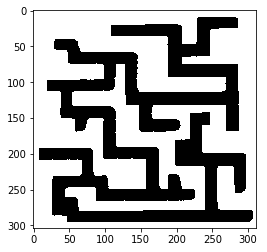

In [17]:
up = (0.75,0,0)
down = (0.25,0,0.0)
left = (0.0,0.75,0)
right = (0.0,0.25,0)

sol = np.zeros_like(img)
dist = np.zeros_like(img)

visited = np.zeros_like(img)
visited[maze_viz[:,:,2] > 0.5] = 1
plt.imshow(visited,interpolation='nearest')

queue = []
for y in xrange(img.shape[0]):
    for x in xrange(img.shape[1]):
        if maze_viz[y,x,:].sum() == 0:
            queue.append([y,x,0,0])
            visited[y,x,:] = 1
steps = 0
print len(queue)
while len(queue) > 0:
    y,x,c,s = queue.pop(0)
    sol[y,x,:] = c
    dist[y,x,:] = s
    visited[y,x,:] = 1
    if y+1 < img.shape[0] and visited[y+1,x,0] < 1:
        queue.append([y+1,x,down,s+1])
        visited[y+1,x,:] = 1
        print 'd'
    if x+1 < img.shape[1] and visited[y,x+1,0] < 1:
        queue.append([y,x+1,right,s+1])
        visited[y,x+1,:] = 1
        print 'd'

    if y-1 >= 0 and visited[y-1,x,0] < 1:
        queue.append([y-1,x,up,s+1])
        visited[y-1,x,:] = 1
        print 'd'

    if x-1 >= 0 and visited[y,x-1,0] < 1:
        queue.append([y,x-1,left,s+1])
        visited[y,x-1,:] = 1
        print 'd'
 
    print len(queue)

    #print visited.sum()/float(visited.shape[0]*visited.shape[1]*visited.shape[2]) 
plt.imshow(visited,interpolation='nearest')
print sol.max()

[ 0.  0.  0.]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in divide


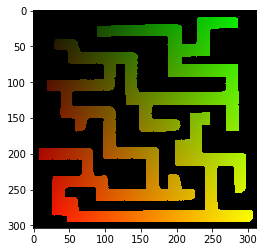

In [4]:
target_pos = np.zeros([sol.shape[0],sol.shape[1],3]) #only using 0 and 1
visited =  np.zeros([sol.shape[0],sol.shape[1]])
visited[maze_viz[:,:,2] > 0.5] = 1

print(sol[0,0,:])
def f(y,x):
    #print y,x
    return { # inverse
        up : (False,(y+1,x)),
        down : (False, (y-1,x)),
        left : (False, (y,x+1)),
        right : (False,(y,x-1)),
        (0,0,0) : (True,(y,x)),
    }[tuple(sol[y,x])]

for y in xrange(img.shape[0]):
    for x in xrange(img.shape[1]):
        if visited[y,x] == 0:
            queue = [(y,x)]
            val = sol[y,x]

            while True:
                yn,xn = queue[-1]
                #print f(yn,xn),queue
                end, new_pos = f(yn,xn)
                #print end,new_pos,queue
                if end:
                    break
                if (sol[new_pos[0],new_pos[1],:] != val).any():
                    break
                queue.append(new_pos)
            #print new_pos,queue
            for q in queue:
                target_pos[q[0],q[1],0] = new_pos[0]
                target_pos[q[0],q[1],1] = new_pos[1]
                visited[q[0],q[1]] = 1
vis_target =target_pos[:,:,:]/np.max(target_pos[:,:,:],(0,1))
plt.imshow(vis_target,interpolation='nearest')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


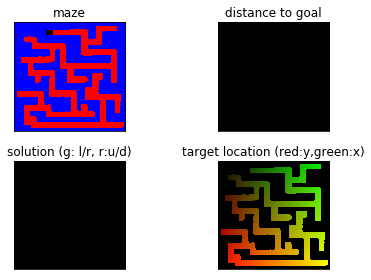

In [5]:
dist /= dist.max()
plt.subplot(2,2,1)
plt.imshow(maze_viz,interpolation='nearest')
plt.xticks([])
plt.title('maze')
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(dist,interpolation='nearest')
plt.xticks([])
plt.title('distance to goal')
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(sol,interpolation='nearest')
plt.title('solution (g: l/r, r:u/d)')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(vis_target,interpolation='nearest')
plt.title('target location (red:y,green:x)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()